#importing the libraries and dependencies



In [1]:
import tensorflow as tf
print(tf.__version__)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from google.colab.patches import cv2_imshow as show
from keras import Model, models, layers, metrics
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from sklearn.utils import shuffle
from sklearn import metrics

2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DissertationCNNModel/Data')

In [ ]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/train'
TEST_DATA_DIR = '/content/drive/MyDrive/DissertationCNNModel/Data/test'

In [ ]:
os.listdir(TRAIN_DATA_DIR)

['rottenapples', 'freshapples', 'freshoranges', 'rottenoranges']

In [ ]:
CATEGORIES = os.listdir(TRAIN_DATA_DIR)

#Loading the training images

In [ ]:
IMG_SIZE = 450

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TRAIN_DATA_DIR, category)  # path to training data, fresh and rotten apples
    print(path)
    class_num = CATEGORIES.index(category)
    print(class_num)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])
      counter+=1
      if(counter == 500): break

create_training_data()

/content/drive/MyDrive/DissertationCNNModel/Data/train/rottenapples
0
/content/drive/MyDrive/DissertationCNNModel/Data/train/freshapples
1
/content/drive/MyDrive/DissertationCNNModel/Data/train/freshoranges
2
/content/drive/MyDrive/DissertationCNNModel/Data/train/rottenoranges
3


In [ ]:
print(len(training_data))

2000


In [ ]:
x_train = []
y_train = []

In [ ]:
for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape
x_train = x_train / 255.0

In [ ]:
print(y_train)

[0 0 0 ... 3 3 3]


In [ ]:
print("Shape of x_train:", x_train.shape)

Shape of x_train: (2000, 450, 450, 3)


In [ ]:
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state = 0)

In [ ]:
x_train.shape[1:]

(450, 450, 3)

#Model construction

In [ ]:
two_objects_simple_cnn_model = Sequential()

two_objects_simple_cnn_model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
two_objects_simple_cnn_model.add(Activation("relu"))
two_objects_simple_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

two_objects_simple_cnn_model.add(Conv2D(64, (3,3)))
two_objects_simple_cnn_model.add(Activation("relu"))
two_objects_simple_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

two_objects_simple_cnn_model.add(Flatten())

two_objects_simple_cnn_model.add(Dense(64))
two_objects_simple_cnn_model.add(Activation("relu"))

two_objects_simple_cnn_model.add(Dense(4, activation ='softmax'))
#model.add(Activation("softmax")) #changed from sigmoid to softmax for multi class classification

In [ ]:
from keras.utils import plot_model
plot_model(two_objects_simple_cnn_model, show_shapes = True)

In [ ]:
two_objects_simple_cnn_model.compile(
  optimizer='adam',
  loss= 'sparse_categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), changing to categorical_crossentropy from binary
  metrics=['accuracy'])

In [ ]:
trained_model = two_objects_simple_cnn_model.fit(x_train_shuffled, y_train_shuffled, batch_size = 16, epochs = 10, validation_split = 0.1 ) # batch_size = 32, epochs = 10, validation_split = 0.2, validation_data = (x_test, y_test)

Epoch 1/10
113/113 [==============================] - 12s 66ms/step - loss: 1.9840 - accuracy: 0.4578 - val_loss: 1.3081 - val_accuracy: 0.4500
Epoch 2/10
113/113 [==============================] - 5s 47ms/step - loss: 0.9603 - accuracy: 0.5867 - val_loss: 0.9885 - val_accuracy: 0.5050
Epoch 3/10
113/113 [==============================] - 5s 47ms/step - loss: 0.8526 - accuracy: 0.6239 - val_loss: 0.9595 - val_accuracy: 0.5500
Epoch 4/10
113/113 [==============================] - 5s 47ms/step - loss: 0.8808 - accuracy: 0.5972 - val_loss: 1.0099 - val_accuracy: 0.5500
Epoch 5/10
113/113 [==============================] - 5s 47ms/step - loss: 0.7880 - accuracy: 0.6450 - val_loss: 1.0249 - val_accuracy: 0.5400
Epoch 6/10
113/113 [==============================] - 5s 47ms/step - loss: 0.7173 - accuracy: 0.6894 - val_loss: 1.0432 - val_accuracy: 0.5500
Epoch 7/10
113/113 [==============================] - 5s 47ms/step - loss: 0.6313 - accuracy: 0.7222 - val_loss: 1.0263 - val_accuracy: 0.530

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 14.0 MB/s eta 0:00:00


In [ ]:
import visualkeras

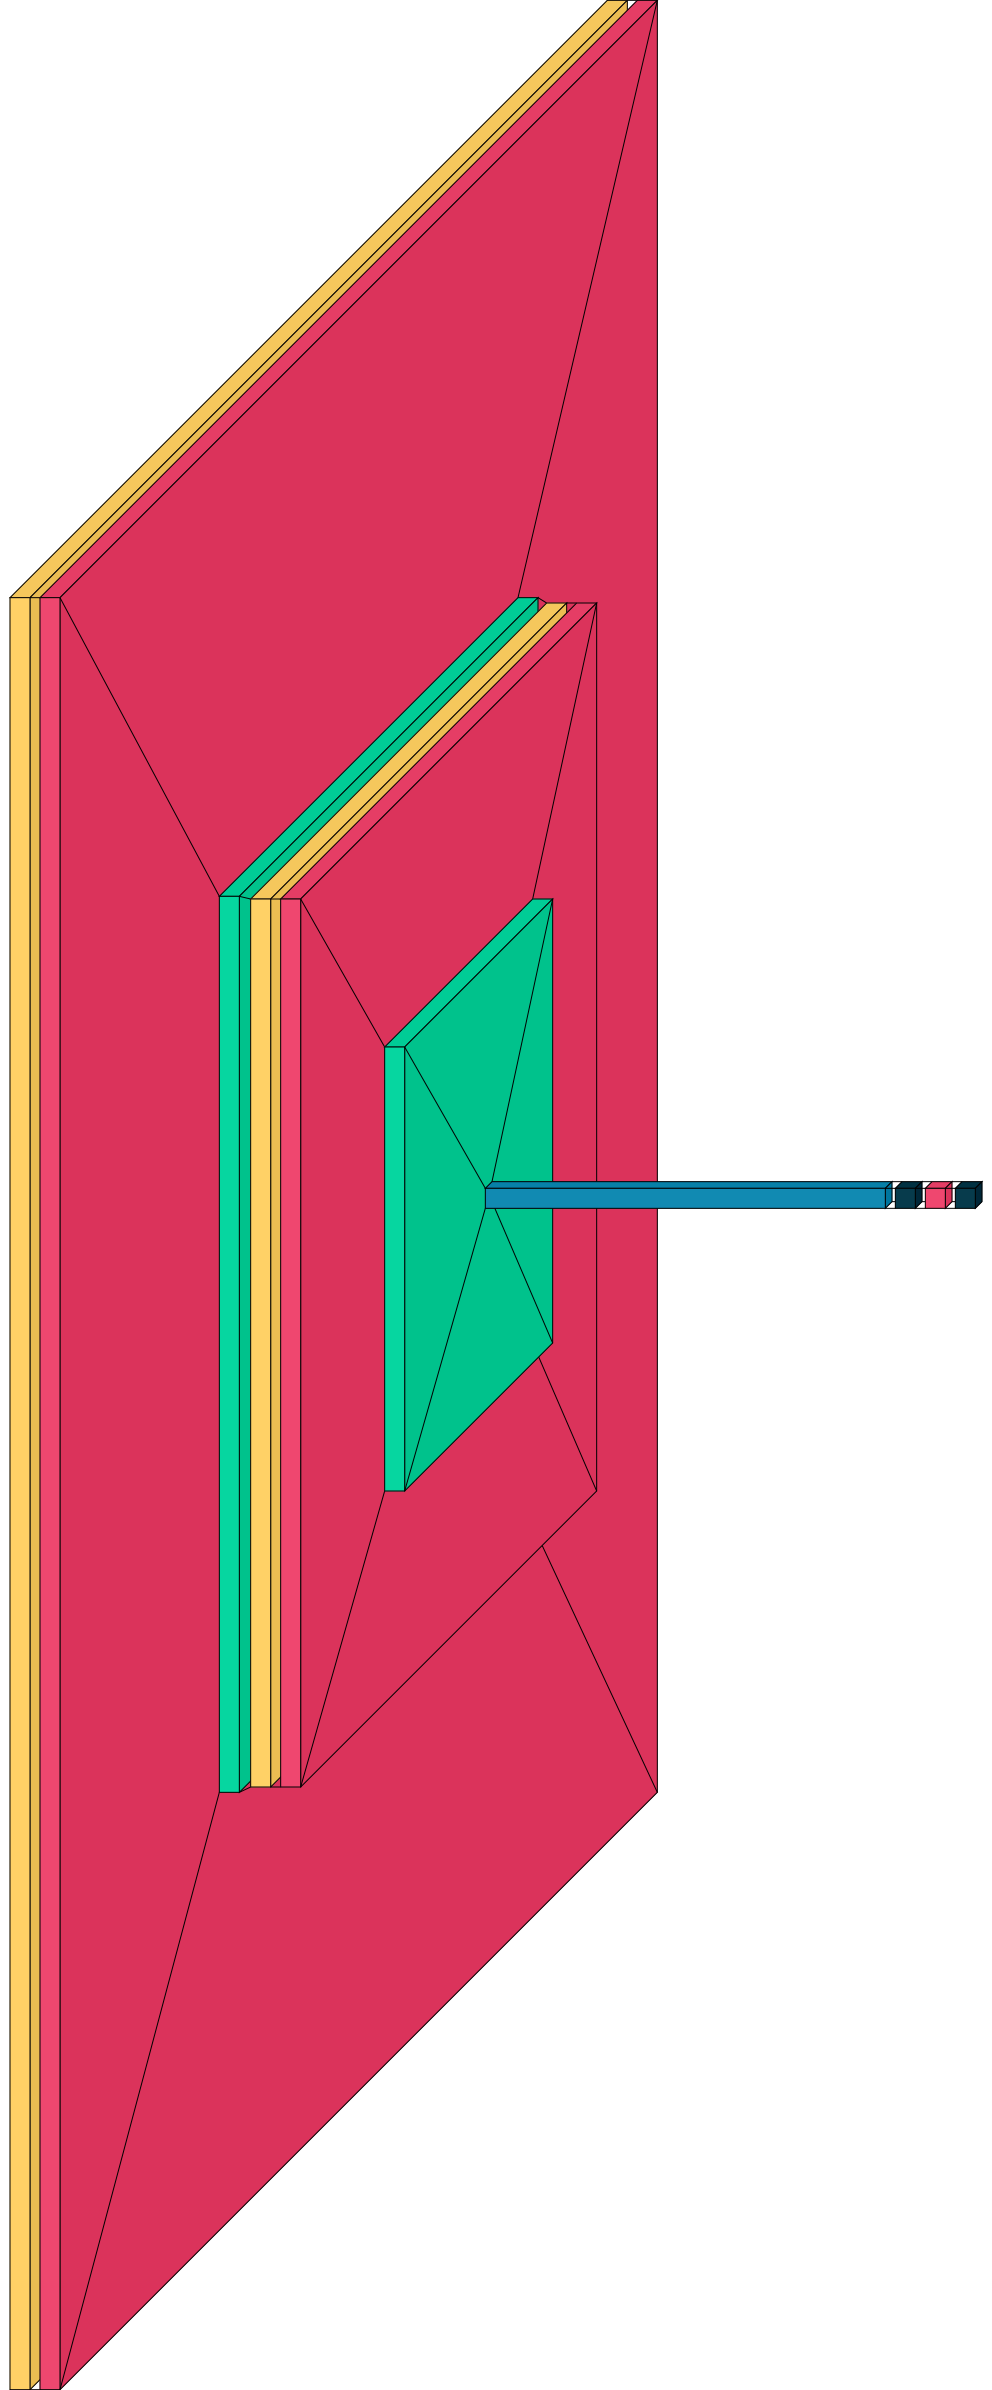

In [ ]:
model = two_objects_simple_cnn_model

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [ ]:
model_json = two_objects_simple_cnn_model.to_json()

#saving the two object model

In [ ]:
from keras.models import model_from_json

In [ ]:
with open("two_objects_simple_cnn_model.json", 'w') as json_file:
  json_file.write(model_json)

two_objects_simple_cnn_model.save_weights("two_objects_simple_cnn_model_weights.h5")
print("Model saved to the disk")

Model saved to the disk


#loading of the 2 object model

In [ ]:
json_file = open("/content/drive/MyDrive/DissertationCNNModel/two_objects_simple_cnn_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/DissertationCNNModel/two_objects_simple_cnn_model_weights.h5")
print("Model loaded")

Model loaded


In [ ]:
loaded_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#loading the test data

In [ ]:
test_data = []

def create_test_data():
  for category in CATEGORIES:
    counter = 0
    path = os.path.join(TEST_DATA_DIR, category)  # path to testing data, fresh and rotten apples
    print(path)
    class_num = CATEGORIES.index(category)
    print(class_num)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      test_data.append([new_array, class_num])
      counter+=1
      if(counter == 200): break

create_test_data()

/content/drive/MyDrive/DissertationCNNModel/Data/test/rottenapples
0
/content/drive/MyDrive/DissertationCNNModel/Data/test/freshapples
1
/content/drive/MyDrive/DissertationCNNModel/Data/test/freshoranges
2
/content/drive/MyDrive/DissertationCNNModel/Data/test/rottenoranges
3


In [ ]:
x_test = []
y_test = []

In [ ]:
for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape
x_test = x_test/255.0

In [ ]:
print(y_test)

In [ ]:
predictions = loaded_model.predict(x_test)

25/25 [==============================] - 4s 36ms/step


In [ ]:
print("Shape of predictions:", predictions.shape)
print("Sample predictions:", predictions[:10])

Shape of predictions: (800, 4)
Sample predictions: [[9.72187042e-01 8.82363995e-04 1.77457056e-03 2.51560453e-02]
 [9.98186052e-01 1.53715047e-03 4.75285633e-09 2.76749197e-04]
 [1.39759332e-01 7.46191572e-03 4.67486769e-01 3.85291934e-01]
 [8.71209145e-01 2.00018659e-03 2.92739235e-02 9.75167900e-02]
 [1.86333850e-01 6.34345051e-04 1.88813925e-01 6.24217868e-01]
 [1.73746645e-01 4.36395872e-03 3.57555449e-01 4.64333892e-01]
 [8.06986690e-01 1.32233635e-01 1.07984615e-05 6.07688501e-02]
 [8.45937133e-01 9.35101658e-02 7.05388049e-03 5.34988157e-02]
 [9.89568532e-01 2.21849594e-04 1.40631618e-03 8.80331360e-03]
 [2.78692484e-01 1.14106480e-02 1.17013082e-01 5.92883766e-01]]


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Sample labels:", y_test[:400])  # Print the first 10 labels

Shape of y_test: (800,)
Sample labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
final_predictions = []
for i in range(len(predictions)):
  max_value_in_row = max(predictions[i])
  array_with_index = np.where(predictions[i] == max_value_in_row)[0]
  final_predictions.append(array_with_index[0])


In [ ]:
print(final_predictions)

[0, 0, 2, 0, 3, 3, 0, 0, 0, 3, 3, 0, 2, 1, 3, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 3, 0, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 2, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 1, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 2, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
unique_labels = np.unique(y_test)
print("Unique labels:", unique_labels)
print("Number of unique labels:", len(unique_labels))

Unique labels: [0 1 2 3]
Number of unique labels: 4


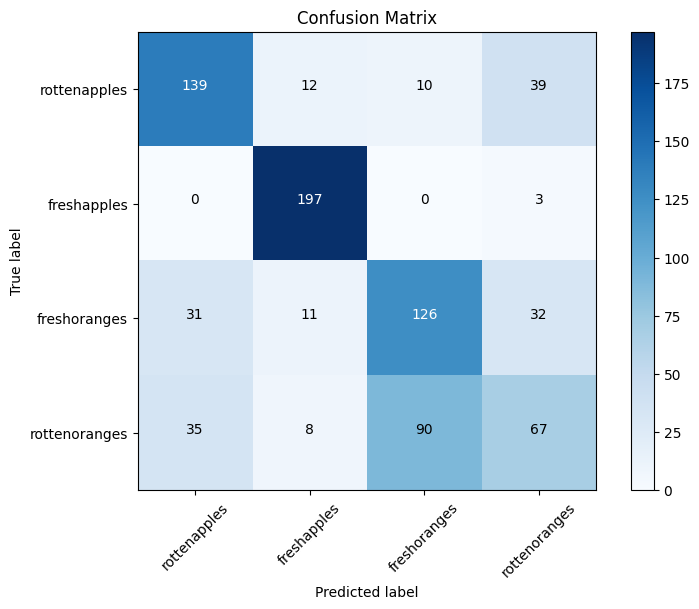

In [ ]:
y_true = y_test  # True labels
y_pred = final_predictions # Predicted labels

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

# Define class labels
classes = ['rottenapples', 'freshapples', 'freshoranges', 'rottenoranges']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()